In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
L = 1.0 
nx = 51  
dx = L / (nx - 1)  
alpha = 1.22e-3  
q = 0.0  

x = numpy.linspace(0.0, L, num=nx)

T0 = numpy.zeros(nx)
T0[0] = 100.0

In [4]:
from scipy import linalg

In [5]:
def lhs_operator(N, sigma):
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(N))
    D[-1, -1] = 1.0 + 1.0 / sigma
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k=1)
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    A = D + U + L
    return A

In [7]:
def rhs_vector(T, sigma, qdx):
    b = T[1:-1] / sigma
    b[0] += T[0]
    b[-1] += qdx
    return b

In [9]:
def btcs_implicit(T0, nt, dt, dx, alpha, q):
    sigma = alpha * dt / dx**2
    A = lhs_operator(len(T0) - 2, sigma)
    T = T0.copy()
    for n in range(nt):
        b = rhs_vector(T, sigma, q * dx)
        T[1:-1] = linalg.solve(A, b)
        T[-1] = T[-2] + q * dx
    return T

In [10]:
sigma = 0.5
dt = sigma * dx**2 / alpha  
nt = 1000  
T = btcs_implicit(T0, nt, dt, dx, alpha, q)

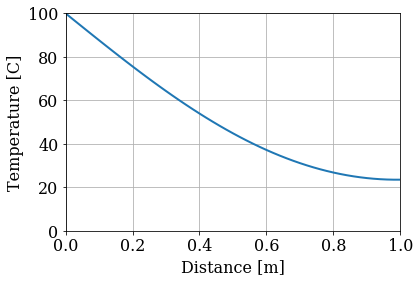

In [11]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

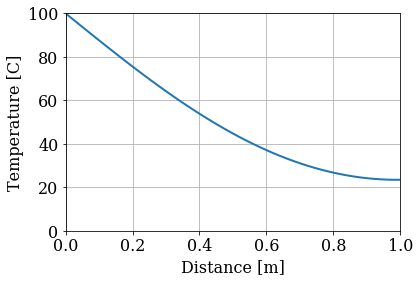

In [12]:
sigma = 5.0
dt = sigma * dx**2 / alpha 
nt = 100  

T = btcs_implicit(T0, nt, dt, dx, alpha, q)

pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);